In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [84]:
data = pd.read_csv(r"C:\Users\mattn\Desktop\CMP3751M_CMP9772M_ML_Assignment 2-dataset-nuclear_plants_final.csv")
data = shuffle(data)
data

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
411,Normal,9.157100,6.482800,10.303300,8.290100,14.202900,5.208800,7.243300,4.149900,1.532400,7.763700,6.600600,4.098800
922,Abnormal,3.477588,6.401418,9.788532,2.686680,4.911606,1.262760,6.170184,1.747362,4.802262,11.365350,8.907762,1.854972
624,Abnormal,2.545200,7.427700,9.999400,5.709200,9.992600,3.366200,4.830800,4.405400,3.452600,1.006200,17.770800,13.238100
446,Normal,2.688900,6.699800,10.015900,7.313200,4.681400,0.287800,3.908300,3.276000,0.886200,8.880800,7.976100,12.194900
853,Abnormal,0.451962,1.976964,4.544100,7.194264,1.052130,2.260320,0.507042,5.460366,11.026404,25.131882,14.472678,14.708094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Normal,4.870600,5.305500,6.872900,12.779800,17.079200,5.400700,0.363000,10.918100,8.003800,11.964100,24.242100,14.964400
131,Normal,4.987800,9.347500,7.477100,15.921000,3.684600,4.211200,6.906900,14.071600,11.345600,5.594300,16.210600,26.550000
850,Abnormal,1.559478,3.575712,4.799916,6.334200,7.238430,0.608430,0.297126,2.584578,18.220362,10.904004,1.468902,20.160096
388,Normal,9.770500,4.670100,8.683800,10.359200,22.861500,6.838700,3.947600,4.078300,8.880800,5.742000,18.980100,10.542500


In [85]:
status = data['Status'].as_matrix()
power1 = data['Power_range_sensor_1'].as_matrix()
power2 = data['Power_range_sensor_2'].as_matrix()
power3 = data['Power_range_sensor_3 '].as_matrix()
power4 = data['Power_range_sensor_4'].as_matrix()
pressure1 = data['Pressure _sensor_1'].as_matrix()
pressure2 = data['Pressure _sensor_2'].as_matrix()
pressure3 = data['Pressure _sensor_3'].as_matrix()
pressure4 = data['Pressure _sensor_4'].as_matrix()
vibration1 = data['Vibration_sensor_1'].as_matrix()
vibration2 = data['Vibration_sensor_2'].as_matrix()
vibration3 = data['Vibration_sensor_3'].as_matrix()
vibration4 = data['Vibration_sensor_4'].as_matrix()

c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\i

In [86]:
#calculate mean of columns
data.mean()

Power_range_sensor_1      4.999574
Power_range_sensor_2      6.379273
Power_range_sensor_3      9.228112
Power_range_sensor_4      7.355272
Pressure _sensor_1       14.199127
Pressure _sensor_2        3.077958
Pressure _sensor_3        5.749234
Pressure _sensor_4        4.997002
Vibration_sensor_1        8.164563
Vibration_sensor_2       10.001593
Vibration_sensor_3       15.187982
Vibration_sensor_4        9.933591
dtype: float64

In [87]:
#calculate standard deviations
data.std()

Power_range_sensor_1      2.764856
Power_range_sensor_2      2.312569
Power_range_sensor_3      2.532173
Power_range_sensor_4      4.354778
Pressure _sensor_1       11.680045
Pressure _sensor_2        2.126091
Pressure _sensor_3        2.526136
Pressure _sensor_4        4.165490
Vibration_sensor_1        6.173261
Vibration_sensor_2        7.336233
Vibration_sensor_3       12.159625
Vibration_sensor_4        7.282383
dtype: float64

In [88]:
#calculate maximum of each column
data.max()

Status                    Normal
Power_range_sensor_1     12.1298
Power_range_sensor_2     11.9284
Power_range_sensor_3     15.7599
Power_range_sensor_4     17.2359
Pressure _sensor_1       67.9794
Pressure _sensor_2       10.2427
Pressure _sensor_3       12.6475
Pressure _sensor_4       16.5556
Vibration_sensor_1       36.1864
Vibration_sensor_2       34.8676
Vibration_sensor_3       53.2384
Vibration_sensor_4       43.2314
dtype: object

In [89]:
#calculate minimum of each column
data.min()

Status                   Abnormal
Power_range_sensor_1       0.0082
Power_range_sensor_2       0.0403
Power_range_sensor_3      2.58397
Power_range_sensor_4       0.0623
Pressure _sensor_1         0.0248
Pressure _sensor_2       0.008262
Pressure _sensor_3       0.001224
Pressure _sensor_4         0.0058
Vibration_sensor_1              0
Vibration_sensor_2         0.0185
Vibration_sensor_3         0.0646
Vibration_sensor_4         0.0092
dtype: object

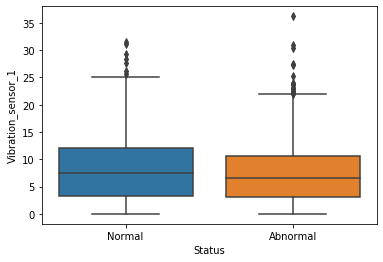

In [90]:
#boxplot
box = sns.boxplot(x="Status", y="Vibration_sensor_1", data=data)


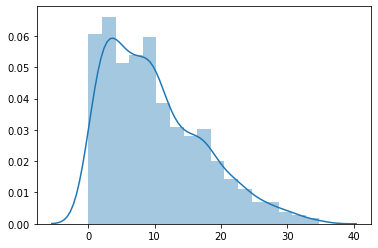

In [91]:
#density plot
vibration2 = data['Vibration_sensor_2'].as_matrix()
sns.distplot(vibration2)

In [92]:
#Preprocessing
X = data.iloc[:, 1:13]
Y = data.select_dtypes(include=[object])#seperate catagorical data
Y.head()

,Status
411,Normal
922,Abnormal
624,Abnormal
446,Normal
853,Abnormal


In [93]:
Y.Status.unique()#Unique values in Y

array(['Normal', 'Abnormal'], dtype=object)

In [105]:
# Turn catagorical data into numerical data
le = preprocessing.LabelEncoder()
Y = Y.apply(le.fit_transform)
Y.Status.unique()

array([1, 0], dtype=int64)

In [95]:
#Split the data into 90% training and 10% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

In [96]:
#Peform feature scaling on the training data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
#Train neural network
mlp = MLPClassifier(hidden_layer_sizes = (500, 500), max_iter = 1000)
mlp.fit(X_train, Y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 500), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [98]:
#Predict test data
predictions = mlp.predict(X_test)

In [100]:
#Evaluate Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[36  5]
 [ 6 53]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.91      0.90      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [113]:

from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(hidden_layer_sizes = (500), max_iter = 1000)
scores = cross_val_score(mlp, X, Y, cv = 10, scoring = 'accuracy')
print(scores)
    

c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\mattn\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\mattn\appdata\local\programs\python\python36\lib\

[0.88       0.86       0.88       0.88       0.91       0.86
 0.9        0.85       0.8877551  0.87755102]
